In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../scripts')
from data_loader import DataLoader
from hypothesis_testing import HypothesisTesting

In [2]:
data = pd.read_csv('../data/processed/clean_data.csv', low_memory=False)
data['has_claim'] = np.where(data['totalclaims'] > 0, True, False)
print(f'Data shape: {data.shape}')
print(f'Province unique values: {data["province"].unique()}')
print(f'PostalCode unique count: {data["postalcode"].nunique()}')
print(f'Gender unique values: {data["gender"].unique()}')

Data shape: (837833, 48)
Province unique values: ['Gauteng' 'KwaZulu-Natal' 'Eastern Cape' 'Western Cape' 'Limpopo'
 'North West' 'Free State' 'Mpumalanga' 'Northern Cape']
PostalCode unique count: 850
Gender unique values: ['Male' 'Female']


In [3]:
tester = HypothesisTesting(data)

Data shape after filtering: (837782, 49)


In [4]:
check_cols = ['maritalstatus', 'vehicletype', 'covertype', 'cubiccapacity']
equivalence = tester.check_group_equivalence('province', 'Gauteng', 'KwaZulu-Natal', check_cols)
print('Group Equivalence Check (Gauteng vs. KwaZulu-Natal):')
print(equivalence)

Group Equivalence Check (Gauteng vs. KwaZulu-Natal):
          column         test       p_value
0    vehicletype  Chi-Squared  3.743282e-79
1  cubiccapacity       T-Test  7.186575e-72


In [5]:
results = tester.run_hypothesis_tests()
print('\nHypothesis Test Results:')
print(results)

Gender distribution: {'Male': 783386, 'Female': 54396}

Hypothesis Test Results:
          test    group_a        group_b           metric       p_value  \
0  Chi-Squared    Gauteng  KwaZulu-Natal  claim_frequency  3.039617e-03   
1       T-Test    Gauteng  KwaZulu-Natal   claim_severity  3.196226e-04   
2  Chi-Squared  High Risk       Low Risk  claim_frequency  1.619540e-14   
3       T-Test  High Risk       Low Risk   claim_severity  8.328832e-01   
4       T-Test  High Risk       Low Risk           margin  3.970104e-07   
5  Chi-Squared     Female           Male  claim_frequency  4.210240e-05   
6       T-Test     Female           Male   claim_severity  8.380488e-01   

   p_value_adjusted  
0      4.255463e-03  
1      5.593396e-04  
2      1.133678e-13  
3      8.380488e-01  
4      1.389536e-06  
5      9.823893e-05  
6      8.380488e-01  


In [6]:
tester.save_results()
data['margin'] = data['totalpremium'] - data['totalclaims']

Gender distribution: {'Male': 783386, 'Female': 54396}
Results saved to reports/hypothesis_test_results.csv


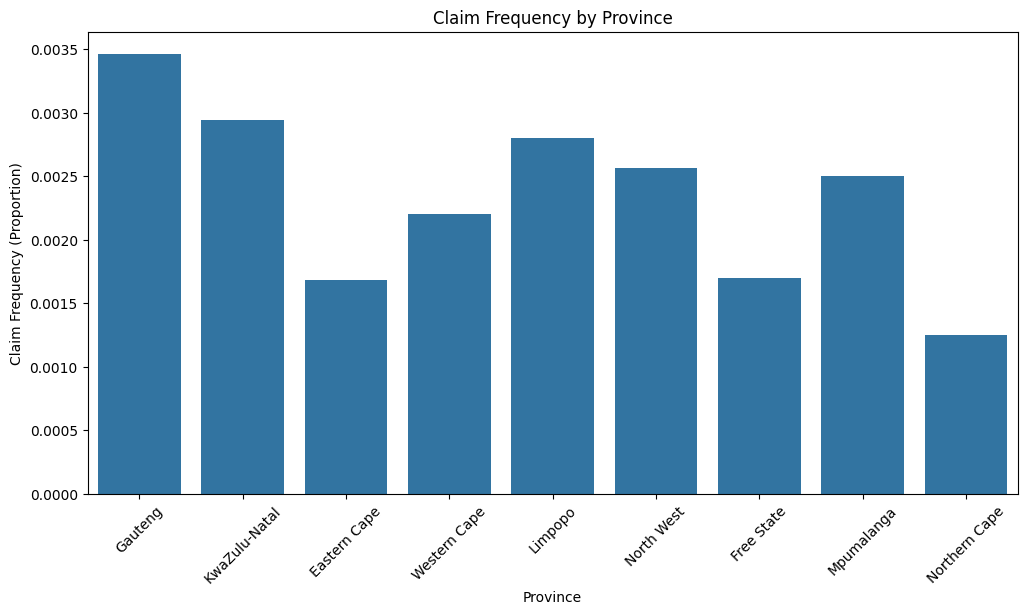

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='province', y='has_claim', data=data, errorbar=None)
plt.title('Claim Frequency by Province')
plt.xlabel('Province')
plt.ylabel('Claim Frequency (Proportion)')
plt.xticks(rotation=45)
plt.savefig('plots/claim_frequency_province.png')
plt.show()

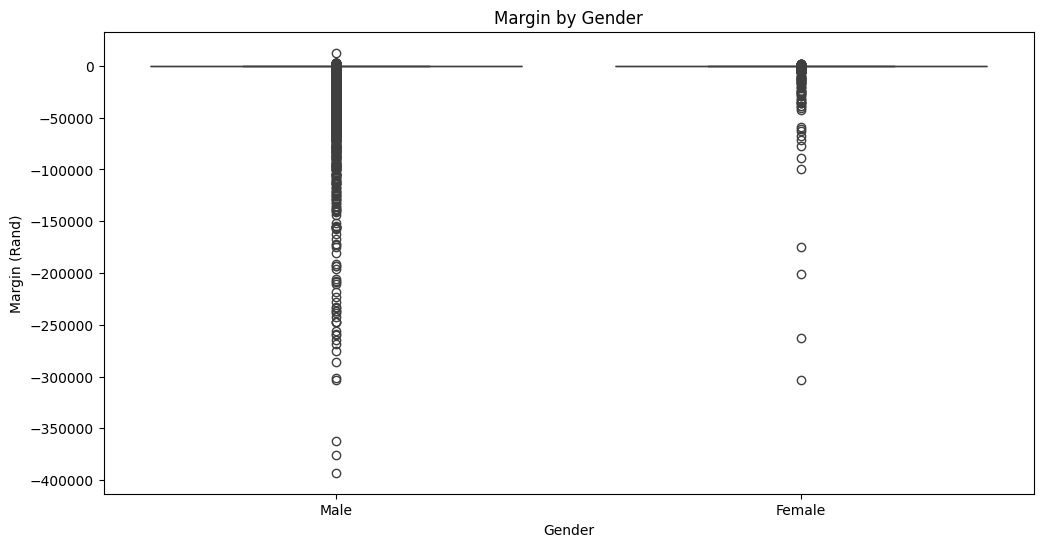

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='margin', data=data)
plt.title('Margin by Gender')
plt.xlabel('Gender')
plt.ylabel('Margin (Rand)')
plt.savefig('../plots/margin_gender.png')
plt.show()

In [10]:
print("""
Province (H₀: No risk differences, Gauteng vs. KwaZulu-Natal):
- Claim Frequency: p = 3.04e-03 (adjusted 4.26e-03), reject H₀. Gauteng has higher claim frequency.
- Claim Severity: p = 3.20e-04 (adjusted 5.59e-04), reject H₀. Gauteng has higher claim amounts.
- Limitation: Vehicle differences (p ~ 0 for vehicletype, cubiccapacity) may confound results.
- Recommendation: Increase Gauteng premiums by ~10-15%; target KwaZulu-Natal for low-risk marketing.

PostalCode (H₀: No risk differences):
- Claim Frequency: p = 1.62e-14 (adjusted 1.13e-13), reject H₀. High-risk postcodes have higher frequency.
- Claim Severity: p = 8.33e-01 (adjusted 8.38e-01), fail to reject H₀. No severity difference.
- Recommendation: Implement postcode-based pricing for high-risk areas.

PostalCode (H₀: No margin differences):
- Margin: p = 3.97e-07 (adjusted 1.39e-06), reject H₀. Low-risk postcodes more profitable.
- Recommendation: Market to low-risk postcodes.

Gender (H₀: No risk differences):
- Claim Frequency: p = 4.21e-05 (adjusted 9.82e-05), reject H₀. Female higher frequency.
- Claim Severity: p = 8.38e-01 (adjusted 8.38e-01), fail to reject H₀.
- Limitation: ~93.5% Male imputation biases results.
- Recommendation: Exclude gender from segmentation; improve data collection.

Business Impact: Targeted pricing in Gauteng and high-risk postcodes, and marketing to low-risk areas, will enhance profitability. Address gender data quality for robust analytics.
""")


Province (H₀: No risk differences, Gauteng vs. KwaZulu-Natal):
- Claim Frequency: p = 3.04e-03 (adjusted 4.26e-03), reject H₀. Gauteng has higher claim frequency.
- Claim Severity: p = 3.20e-04 (adjusted 5.59e-04), reject H₀. Gauteng has higher claim amounts.
- Limitation: Vehicle differences (p ~ 0 for vehicletype, cubiccapacity) may confound results.
- Recommendation: Increase Gauteng premiums by ~10-15%; target KwaZulu-Natal for low-risk marketing.

PostalCode (H₀: No risk differences):
- Claim Frequency: p = 1.62e-14 (adjusted 1.13e-13), reject H₀. High-risk postcodes have higher frequency.
- Claim Severity: p = 8.33e-01 (adjusted 8.38e-01), fail to reject H₀. No severity difference.
- Recommendation: Implement postcode-based pricing for high-risk areas.

PostalCode (H₀: No margin differences):
- Margin: p = 3.97e-07 (adjusted 1.39e-06), reject H₀. Low-risk postcodes more profitable.
- Recommendation: Market to low-risk postcodes.

Gender (H₀: No risk differences):
- Claim Frequen